# GRO620 - Activité procédurale 3

In [1]:
# Préambule

import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données. 
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive

## Filtrage linéaire - suite

### Q1.1

Soit cette image :

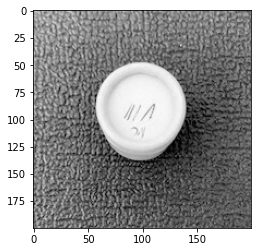

In [2]:
img_q11_org  = cv2.imread("images_doc/proc2-q1-object.jpeg")
img_q11_mono = np.float32(cv2.cvtColor(img_q11_org, cv2.COLOR_BGR2GRAY)) / 255.
plt.imshow(img_q11_mono, cmap="gray")

Utilisez un filtre linéaire de Sobel (voir sections 3.2.1 et 4.2.1) pour faire ressortir les contours de cette image.

*Pas complété pcq même genre de numéro que avant-dernier numéro dans proc2*

In [3]:
sobel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]) * (1/8.)


## Filtrage non-linéaire

### Q2.1

Soit cette image :

*Complété à Xmins*

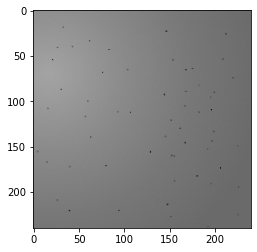

In [19]:
img_q21_org = cv2.imread("images_doc/proc2-q3-sand.png")
img_q21_mono = cv2.cvtColor(img_q21_org, cv2.COLOR_BGR2GRAY)

plt.imshow(img_q21_org)

Utilisez un filtre **non-linéaire** pour tenter de retirer les points noirs dans l'image.

*Complété à 35mins*

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2574b990d00>)

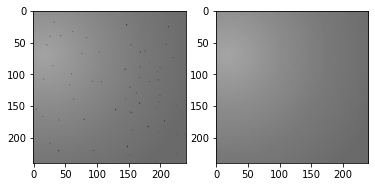

In [18]:
img_q21_filt = img_q21_org.copy()

kernel = np.ones((5, 5), np.uint8)
dilation = cv2.dilate(img_q21_filt, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img_q21_org)
plt.subplot(122), plt.imshow(dilation)

## Chaîne de filtrage

### Q3.1

En reprenant la figure originale de la question Q1.1, appliquez une succession de filtres pour mieux isoler le contour de l'objet au centre de l'image.

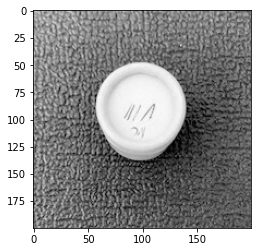

In [6]:
img_q31 = img_q11_mono
plt.imshow(img_q31, cmap="gray")


### Q3.2

Répétez l'exercice précédent, mais avec un filtre de Canny.

*Complété à 59mins*

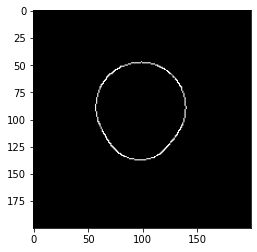

In [7]:
img_q32 = img_q11_org
blur_img = cv2.GaussianBlur(img_q32, (15, 15), 0)
img_q32_canny = cv2.Canny(blur_img, 100, 200)

plt.imshow(img_q32_canny, cmap="gray")

## Analyse de formes

### Q4.1

Soit cette image :

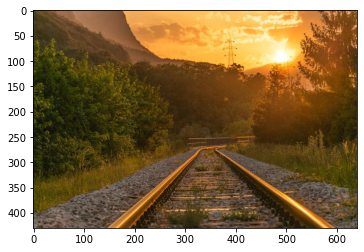

In [8]:
img_q41_org  = cv2.imread("images_doc/proc3-q4-tracks.jpeg")
img_q41_rgb = cv2.cvtColor(img_q41_org, cv2.COLOR_BGR2RGB)
plt.imshow(img_q41_rgb)

(Source de l'image originale : [Krivec Ales, Pexels](https://www.pexels.com/photo/clouds-cloudy-country-distance-552779/))

Trouvez et tracez les lignes dominantes à l'aide de la transformée de Hough.

*Complété à 1heure 10mins*

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x2574b59f970>)

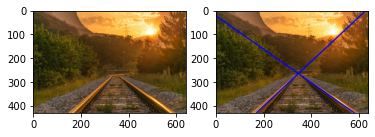

In [9]:
img_rgb_copy = img_q41_rgb.copy()
img_q41_mono = cv2.cvtColor(img_q41_rgb, cv2.COLOR_BGR2GRAY)

blur_img = cv2.GaussianBlur(img_q41_mono, (5, 5), 0)
dst_canny = cv2.Canny(blur_img, 50, 300)

# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst_canny, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst_canny, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img_rgb_copy, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

plt.subplot(121), plt.imshow(img_q41_rgb)
plt.subplot(122), plt.imshow(img_rgb_copy)

### Q4.2

En reprenant l'image des questions Q1.1 et Q3.1, trouvez, tracez et afficher les coordonnées (en pixels) de la boîte (*bounding box*) contenant les contours de l'objet à l'aide de cv2.findContours()

*Complété à 1heure 50mins*

[57, 47, 141, 138]


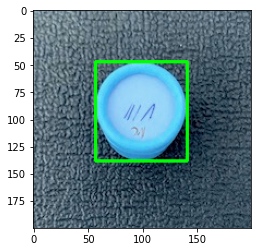

In [10]:
img_q41_out = img_q11_org.copy() # Pour le résultat

blur = cv2.GaussianBlur(img_q41_out, (15, 15), 0)
minVal = 150
maxVal = 250
edges = cv2.Canny(blur, minVal, maxVal)
plt.imshow(edges)
cnt, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(cnt[0])
rectangle = cv2.rectangle(img_q41_out, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(rectangle)
print([x, y, x + w, y + h])